# FIT5202 Assignment 2A : Building models to predict future eCommerce sales

## Table of Contents
*  
    * [Part 1 : Data Loading, Transformation and Exploration](#part-1)
    * [Part 2 : Feature extraction and ML training](#part-2)
    * [Part 3 : Data Ethics, Privacy, and Security](#part-4)
 
Please add code/markdown cells as you need.

# Part 1: Data Loading, Transformation and Exploration <a class="anchor" name="part-1"></a>
## 1.1 Data Loading
In this section, you will need to load the given datasets into PySpark DataFrames and use DataFrame functions to process the data. Usage of Spark SQL is discouraged, and your can only use pandas to format results. For plotting, different visualisation packages can be used, but please ensure that you have included instructions to install the additional packages and the installation will be successful in the provided docker container(in case your marker needs to clear the notebook and rerun it).

### 1.1.1 Data Loading <a class="anchor" name="1.1"></a>
Write the code to create a SparkSession. For creating the SparkSession, you need to use a SparkConf object to configure the Spark app with a proper application name, to ensure the maximum partition size not exceed 20MB, and to run locally with all CPU cores on your machine (note: if you have insufficient RAM, reducing the number of cores is also acceptable.)

In [1]:
from pyspark.sql import SparkSession
from pyspark import SparkConf

appname = "Assignment2"
master = "local[*]"
maxParB = "spark.sql.files.maxPartitionBytes"
conf = SparkConf().setAppName(appname).set(maxParB, str(20 * 1024 * 1024)).setMaster(master)  

spark = SparkSession.builder.config(conf=conf).getOrCreate()

1.1.2 Write code to define the schemas for category, customer, product, clickstream and transaction datasets, following the data types suggested in the metadata file.

In [2]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, FloatType, DateType, TimestampType

# Schema for the Customer dataset
customer_schema = StructType([
    StructField("#", IntegerType(), True),
    StructField("customer_id", IntegerType(), True),
    StructField("first_name", StringType(), True),
    StructField("last_name", StringType(), True),
    StructField("username", StringType(), True),
    StructField("email", StringType(), True),
    StructField("gender", StringType(), True),
    StructField("birthdate", DateType(), True),
    StructField("device_type", StringType(), True),
    StructField("device_id", StringType(), True),
    StructField("device_version", StringType(), True),
    StructField("home_location_lat", FloatType(), True),
    StructField("home_location_long", FloatType(), True),
    StructField("home_location", StringType(), True),
    StructField("home_country", StringType(), True),
    StructField("first_join_date", StringType(), True)
])

# Schema for the Category dataset
category_schema = StructType([
    StructField("#", IntegerType(), True),
    StructField("category_id", IntegerType(), True),
    StructField("cat_level1", StringType(), True),
    StructField("cat_level2", StringType(), True),
    StructField("cat_level3", StringType(), True)
])

# Schema for the Click Stream dataset
click_stream_schema = StructType([
    StructField("#", IntegerType(), True),
    StructField("session_id", StringType(), True),
    StructField("event_name", StringType(), True),
    StructField("event_time", TimestampType(), True),
    StructField("event_id", StringType(), True),
    StructField("traffic_source", StringType(), True),
    StructField("event_metadata", StringType(), True)
])

# Schema for the Product dataset
product_schema = StructType([
    StructField("#", IntegerType(), True),
    StructField("id", IntegerType(), True),
    StructField("gender", StringType(), True),
    StructField("baseColour", StringType(), True),
    StructField("season", StringType(), True),
    StructField("year", StringType(), True),
    StructField("usage", StringType(), True),
    StructField("productDisplayName", StringType(), True),
    StructField("category_id", IntegerType(), True)
])

# Schema for the Transaction dataset
transaction_schema = StructType([
    StructField("#", IntegerType(), True),
    StructField("created_at", TimestampType(), True),
    StructField("customer_id", IntegerType(), True),
    StructField("booking_id", StringType(), True),
    StructField("session_id", StringType(), True),
    StructField("product_metadata", StringType(), True),
    StructField("payment_method", StringType(), True),
    StructField("payment_status", StringType(), True),
    StructField("promo_amount", FloatType(), True),
    StructField("promo_code", StringType(), True),
    StructField("shipment_fee", FloatType(), True),
    StructField("shipment_date_limit", DateType(), True),
    StructField("shipment_location_lat", StringType(), True),
    StructField("shipment_location_long", StringType(), True),
    StructField("total_amount", FloatType(), True)
])


1.1.3 Using predefined schema, write code to load the csv files into separate dataframes. Print the schemas of all dataframes.

In [18]:
path_customer = "dataset/customer.csv"
path_category = "dataset/category.csv"
path_click_stream = "dataset/click_stream.csv"
path_customer_session = "dataset/customer_session.csv"
path_product = "dataset/product.csv"
path_transaction = "dataset/transactions.csv"

df_customer = spark.read.csv(path_customer, schema=customer_schema, header=True)
df_category = spark.read.csv(path_category, schema=category_schema, header=True)
df_click_stream = spark.read.csv(path_click_stream, schema=click_stream_schema, header=True)
df_customer_session = spark.read.csv(path_customer_session, header=True)
df_product = spark.read.csv(path_product, schema=product_schema, header=True)
df_transaction = spark.read.csv(path_transaction, schema=transaction_schema, header=True)

print("Customer DataFrame Schema:")
df_customer.printSchema()

print("Category DataFrame Schema:")
df_category.printSchema()

print("Click Stream DataFrame Schema:")
df_click_stream.printSchema()

print("Customer Session DataFrame Schema:")
df_customer_session.printSchema()

print("Product DataFrame Schema:")
df_product.printSchema()

print("Transaction DataFrame Schema:")
df_transaction.printSchema()

Customer DataFrame Schema:
root
 |-- #: integer (nullable = true)
 |-- customer_id: integer (nullable = true)
 |-- first_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- username: string (nullable = true)
 |-- email: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- birthdate: date (nullable = true)
 |-- device_type: string (nullable = true)
 |-- device_id: string (nullable = true)
 |-- device_version: string (nullable = true)
 |-- home_location_lat: float (nullable = true)
 |-- home_location_long: float (nullable = true)
 |-- home_location: string (nullable = true)
 |-- home_country: string (nullable = true)
 |-- first_join_date: string (nullable = true)

Category DataFrame Schema:
root
 |-- #: integer (nullable = true)
 |-- category_id: integer (nullable = true)
 |-- cat_level1: string (nullable = true)
 |-- cat_level2: string (nullable = true)
 |-- cat_level3: string (nullable = true)

Click Stream DataFrame Schema:
root
 |-- #: integer 

### 1.2 Data Transformation to Create Features <a class="anchor" name="1.2"></a>
In the clickstream dataset, there are 9 types of events/actions: 

VIEW_PROMO, SCROLL, ADD_PROMO, VIEW_ITEM, CLICK, PURCHASE, ADD_TO_CART, HOMEPAGE, SEARCH  

We categorize them into 3 different categories:  
Category 1(high value actions - highly likely to purchase): PURCHASE, ADD_PROMO, ADD_TO_CART  
Category 2(medium value actions - likely to purchase): VIEW_PROMO, VIEW_ITEM, SEARCH  
Category 3(low value actions - just browsing):  SCROLL, HOMEPAGE, CLICK  

Write code to perform the following consecutive tasks (5% each) based on the clickstream dataframe and create a new feature dataframe. 

1.2.1 For each unique session_id, create 3 columns (with names: num_cat_highvalue, num_cat_midvalue, num_cat_lowvalue) to store the number of actions for the three categories, respectively. Fill NULL values in these columns with 0, when there are no events of certain category. Count and show the number of actions in each category.

In [20]:
from pyspark.sql import functions as F

# Define the categories based on event types
high_value_actions = ['PURCHASE', 'ADD_PROMO', 'ADD_TO_CART']
medium_value_actions = ['VIEW_PROMO', 'VIEW_ITEM', 'SEARCH']
low_value_actions = ['SCROLL', 'HOMEPAGE', 'CLICK']

# Categorize events based on their type
df_categorized = df_click_stream.withColumn(
    "category",
    F.when(F.col("event_name").isin(high_value_actions), "num_cat_highvalue")
    .when(F.col("event_name").isin(medium_value_actions), "num_cat_midvalue")
    .otherwise("num_cat_lowvalue")
)

df_category_counts = df_categorized.groupBy("session_id").pivot("category").count()

expected_columns = ["num_cat_highvalue", "num_cat_midvalue", "num_cat_lowvalue"]
for column in expected_columns:
    if column not in df_category_counts.columns:
        df_category_counts = df_category_counts.withColumn(column, F.lit(0))
        
feature_df = df_category_counts.na.fill({
    "num_cat_highvalue": 0,
    "num_cat_midvalue": 0,
    "num_cat_lowvalue": 0
})

feature_df.show(truncate=False)

total_counts = df_category_counts.agg(
    F.sum("num_cat_highvalue").alias("Total High Value Actions"),
    F.sum("num_cat_midvalue").alias("Total Medium Value Actions"),
    F.sum("num_cat_lowvalue").alias("Total Low Value Actions")
)

total_counts.show()

+------------------------------------+-----------------+----------------+----------------+
|session_id                          |num_cat_highvalue|num_cat_lowvalue|num_cat_midvalue|
+------------------------------------+-----------------+----------------+----------------+
|00150d6f-02e1-45e8-aa67-f7ea32533326|2                |10              |7               |
|0020d8a4-effe-40a6-be7a-561b07e2e70b|4                |3               |1               |
|0040247a-bc2a-4125-807f-421ad9c5928e|2                |3               |1               |
|00683068-ed46-4393-b912-99fa051f2332|4                |11              |4               |
|00c94897-1d95-4928-8741-bd33665bf984|4                |2               |0               |
|01191df2-8a10-4f18-a8c8-a934afbf6dad|9                |12              |3               |
|01532321-42ef-495f-b25a-47333d1865ad|3                |2               |3               |
|01644963-de4e-40bc-a66a-f1ae3a56d971|2                |22              |5               |

1.2.2 For each unique session_id, create a new column “is_promotion” with value of 1 or 0 and add to feature_df. If there are “ADD_PROMO” actions in a session, set it to 1, otherwise 0.

In [21]:
from pyspark.sql import functions as F

df_promotion = df_click_stream.withColumn(
    "is_promotion",
    F.when(F.col("event_name") == "ADD_PROMO", 1).otherwise(0)
)

df_promotion_summary = df_promotion.groupBy("session_id").agg(
    F.max("is_promotion").alias("is_promotion")
)

feature_df = feature_df.join(df_promotion_summary, on="session_id", how="left_outer")

feature_df = feature_df.na.fill({"is_promotion": 0})


1.2.3 For each unique session_id, based on column "event_time", extract the season. (note: The dataset is from Indonesia, Spring: Mar-May, Summer: Jun-Aug, Autumn: Sep-Nov, Winter: Dec-Feb)

In [22]:
from pyspark.sql import functions as F
from pyspark.sql.types import StringType

def get_season(month):
    if 3 <= month <= 5:
        return "Spring"
    elif 6 <= month <= 8:
        return "Summer"
    elif 9 <= month <= 11:
        return "Autumn"
    elif month in [12, 1, 2]:
        return "Winter"

season_udf = F.udf(get_season, StringType())

df_click_stream = df_click_stream.withColumn(
    "month", F.month("event_time")
).withColumn(
    "season", season_udf("month")
)

df_season = df_click_stream.groupBy("session_id").agg(
    F.max("season").alias("season")  
)

1.2.4 Join tables to find customer information and add these columns to feature_df: gender, age, device type, home_location, first join year. (Note: Use integer type for age and first join year)

In [23]:
from datetime import datetime
from pyspark.sql.functions import month, dayofmonth, datediff, current_date, to_date, col
from pyspark.sql.types import IntegerType

df_customer = df_customer.withColumn("first_join_date", F.to_date(F.col("first_join_date")))
df_customer = df_customer.withColumn("first_join_year", F.year(F.col("first_join_date")).cast("integer"))

current_year = datetime.now().year
current_date = datetime.now()
df_customer = df_customer.withColumn("birthdate", F.to_date(col("birthdate"), "dd-MM-yyyy"))
df_customer = df_customer.withColumn("age", (F.datediff(F.current_date(), col("birthdate")) / 365.25).cast("integer"))

df_customer_after = df_customer.select(
    "customer_id", "gender", "age", "device_type", "home_location", "first_join_year"
)

df_customer_after_01 = df_customer_session.join(df_customer_after, "customer_id")
feature_df = feature_df.join(df_customer_after_01, "session_id")


1.2.5 Join tables to find out if the customer made purchase or not in each unique session (based on the column “payment_status” in the transaction.csv), and add it to feature_df as 1 (if payment_status = “Success”) or 0 (if payment_status = “Fail”). This column is used as class label for classification model training and testing.

In [24]:
df_transaction = df_transaction.withColumn("purchase", F.when(F.col("payment_status") == "Success", 1).otherwise(0))

df_transaction = df_transaction.select("session_id", "customer_id", "purchase")

feature_df = feature_df.join(df_transaction, on=["session_id", "customer_id"], how="left")

feature_df = feature_df.na.fill({"purchase": 0})

feature_df = feature_df.join(df_season,"session_id")

required_columns = [
    "session_id", "customer_id",
    "num_cat_highvalue", "num_cat_midvalue", "num_cat_lowvalue",
    "is_promotion",
    "season", "gender", "age", "device_type", "home_location", "first_join_year",
    "purchase"  
]

for column in required_columns:
    if column not in feature_df.columns:
        feature_df = feature_df.withColumn(column, F.lit(None))

default_values = {
    "gender": "Unknown", "age": -1, "device_type": "Unknown",
    "home_location": "Unknown", "first_join_year": -1
}
feature_df = feature_df.na.fill(default_values)

### 1.3 Exploring the Data <a class="anchor" name="1.3"></a>
**1.3.1 With the feature_df, write code to show the basic statistics: a) For each numeric column, show count, mean, stddev, min, max, 25 percentile, 50 percentile, 75 percentile; b)For each non-numeric column, display the top-5 values and the corresponding counts; c) For each boolean column, display the value and count.**

In [9]:
from pyspark.sql.types import IntegerType, FloatType, StringType, BooleanType

numeric_cols = [field.name for field in feature_df.schema.fields if isinstance(field.dataType, (IntegerType, FloatType))]

numeric_stats = feature_df.describe(numeric_cols)

for col_name in numeric_cols:
    percentiles = feature_df.approxQuantile(col_name, [0.25, 0.5, 0.75], 0.05)  # 0.05 is the relative error
    print(f"Percentiles for {col_name}: 25% = {percentiles[0]}, 50% (median) = {percentiles[1]}, 75% = {percentiles[2]}")

numeric_stats.show()

non_numeric_cols = [field.name for field in feature_df.schema.fields if isinstance(field.dataType, StringType)]

for col_name in non_numeric_cols:
    feature_df.groupBy(col_name).count().orderBy("count", ascending=False).show(5)

boolean_cols = [field.name for field in feature_df.schema.fields if isinstance(field.dataType, BooleanType)]

for col_name in boolean_cols:
    feature_df.groupBy(col_name).count().show()


Percentiles for is_promotion: 25% = 0.0, 50% (median) = 0.0, 75% = 1.0
Percentiles for age: 25% = 23.0, 50% (median) = 27.0, 75% = 31.0
Percentiles for first_join_year: 25% = 2017.0, 50% (median) = 2018.0, 75% = 2020.0
Percentiles for purchase: 25% = 0.0, 50% (median) = 1.0, 75% = 1.0
+-------+-------------------+------------------+-----------------+------------------+
|summary|       is_promotion|               age|  first_join_year|          purchase|
+-------+-------------------+------------------+-----------------+------------------+
|  count|             852582|            852582|           852582|            852582|
|   mean|0.38299541862249026|27.715895949011355|2018.674827758503|0.6190747634831606|
| stddev|0.48611748076646666| 7.283218736839399|1.675915662285815|0.4856145357155806|
|    min|                  0|                 8|             2016|                 0|
|    max|                  1|                69|             2022|                 1|
+-------+-----------------

**1.3.2 Explore the dataframe and write code to present one plot  worthy of presentation to the company, describe your plot and discuss the findings from the plot.**

- The plot can be based on the created feature_df.
- Hint: You can use the basic plots (e.g., histograms, line charts, scatter plots) for the relationship between a column and the label; or more advanced plots like correlation plots. If your data is too large for the plotting, consider using sampling before plotting.
- 150 words max for description and discussion of the plotted results
- Feel free to use any plotting libraries: matplotlib, seabon, plotly, etc.
- Please only use the provided data for visualisation



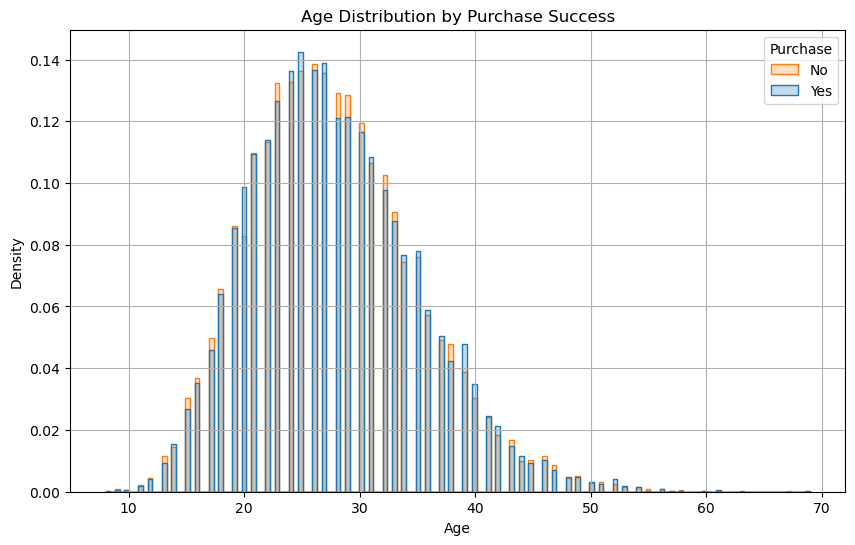

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sampled_data = feature_df.sample(fraction=0.1, withReplacement=False)  

sampled_data = sampled_data.withColumn("age", sampled_data["age"].cast("integer"))

plot_data = sampled_data.select("age", "purchase").toPandas()

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(data=plot_data, x="age", hue="purchase", element="step", stat="density", common_norm=False)
plt.title('Age Distribution by Purchase Success')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Purchase', labels=['No', 'Yes'])
plt.grid(True)
plt.show()


There is a significant concentration of activity in the younger age groups, particularly those between 20 to 30 years old, where the number of transactions, both successful and unsuccessful, is the highest. This suggests that younger consumers are the most active on the platform. But notably, the younger demographics (below 30) have a slightly higher ratio of success. The data indicates that marketing efforts might be most effectively placed on younger users, given their higher engagement and success rates. However, for older age groups, there might be an opportunity to investigate why their purchase success rate isn't higher and whether there are barriers that could be addressed to improve these rates.

## Part 2. Feature extraction and ML training <a class="anchor" name="part-2"></a>
In this section, you will need to use PySpark DataFrame functions and ML packages for data preparation, model building, and evaluation. Other ML packages, such as scikit-learn, would receive zero marks. Excessive usage of Spark SQL is discouraged.

### 2.1 Preparing Spark ML Transformers/Estimators for features, labels, and models  <a class="anchor" name="2.2"></a>

**2.1.1 Write code to prepare feature columns.** 

**(i) Discuss reasons for removing, selecting and adding these features for model building.**

In preparing data for machine learning models, it is important to carefully select features that enhance the model's predictive power while eliminating those that do not contribute meaningfully. Specifically identifiers such as customer_id, session_id, first_name, last_name, username, and email are removed because they are unique to each individual transaction and do not aid in generalization. Similarly, specific hardware details like device_id and device_version are considered less predictive compared to generalized categories such as device_type.

To improve the model's effectiveness, new features are introduced. Age can be categorized into groups such as young, adult, and senior to better capture the purchasing behaviors at different life stages, potentially revealing trends that affect consumer behavior. Additionally, incorporating a feature like season is essential because buying patterns often shift with the seasons, influenced by factors like holidays and weather conditions.

The rationale behind these choices is to prevent the model from learning from noise and to ensure it can generalize well on new/unseen data. Selected features like age, device type, and season are known to influence consumer behavior significantly, which can be leveraged to predict purchasing patterns effectively. By binning ages into specific groups, the model might better recognize and adapt to the nuances of demographic-specific purchasing behaviors, enhancing its overall accuracy and reliability.

**(ii) Display the counts of NULL values in each feature columns. Drop rows of the feature_df that contains NULL values.**

In [25]:
from pyspark.sql.functions import count, when, isnull
from pyspark.sql.functions import when, col

feature_df_dropped = feature_df.drop("customer_id", "session_id", "first_name", "last_name", "username", "email", "device_id", "device_version")

feature_df_add = feature_df_dropped.withColumn("age_group", 
                                   when(col("age") < 25, "young")
                                   .when((col("age") >= 25) & (col("age") < 60), "adult")
                                   .otherwise("senior"))

null_counts = feature_df.select([count(when(isnull(c), c)).alias(c) for c in feature_df.columns])
null_counts.show()

feature_df = feature_df.na.drop()

feature_df.describe().show()

+----------+-----------+-----------------+----------------+----------------+------------+---+------+---+-----------+-------------+---------------+--------+------+
|session_id|customer_id|num_cat_highvalue|num_cat_lowvalue|num_cat_midvalue|is_promotion|  #|gender|age|device_type|home_location|first_join_year|purchase|season|
+----------+-----------+-----------------+----------------+----------------+------------+---+------+---+-----------+-------------+---------------+--------+------+
|         0|          0|                0|               0|               0|           0|  0|     0|  0|          0|            0|              0|       0|     0|
+----------+-----------+-----------------+----------------+----------------+------------+---+------+---+-----------+-------------+---------------+--------+------+

+-------+--------------------+------------------+------------------+-----------------+------------------+-------------------+------------------+------+------------------+-----------+--

**2.1.2 Write code to create Transformers/Estimators for transforming/assembling the columns you selected above, and create ML model Estimators for Random Forest (RF) and Gradient-boosted tree (GBT) model.
Please DO NOT fit/transform the data yet**

In [12]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier, GBTClassifier

categoricalCols = ['gender', 'device_type', 'home_location', 'age', 'season']
indexOutputCols = [x + "Index" for x in categoricalCols]
oheOutputCols = [x + "OHE" for x in categoricalCols]

stringIndexer = StringIndexer(inputCols=categoricalCols, outputCols=indexOutputCols)

oneHotEncoder = OneHotEncoder(inputCols=indexOutputCols, outputCols=oheOutputCols)

assemblerInputs = oheOutputCols + ['num_cat_highvalue', 'num_cat_midvalue', 'num_cat_lowvalue', 'is_promotion', 'first_join_year']
vectorAssembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")

preprocessingPipeline = Pipeline(stages=[stringIndexer, oneHotEncoder, vectorAssembler])

rf = RandomForestClassifier(featuresCol='features', labelCol='purchase', numTrees=10)

gbt = GBTClassifier(featuresCol='features', labelCol='purchase', maxIter=10)


**2.1.3. Write code to include the above Transformers/Estimators into two pipelines.
Please DO NOT fit/transform the data yet**

In [13]:
from pyspark.ml import Pipeline

rf_pipeline = Pipeline(stages=[
    stringIndexer,  
    oneHotEncoder,  
    vectorAssembler,  
    rf  
])

# Pipeline for Gradient-boosted Tree Model
gbt_pipeline = Pipeline(stages=[
    stringIndexer, 
    oneHotEncoder, 
    vectorAssembler,  
    gbt  
])


### 2.3 Preparing the training data and testing data  
Write code to split the data for training and testing purposes. 
You can perform a train/test split (with ratio of 0.8:0.2).

In [14]:
train_df, test_df = feature_df.randomSplit([0.8, 0.2]) 

print("Training Dataset Count: " + str(train_df.count()))
print("Testing Dataset Count: " + str(test_df.count()))

Training Dataset Count: 681579
Testing Dataset Count: 171003


### 2.4 Training and evaluating models  
2.4.1 Write code to use the corresponding ML Pipelines to train the models on the training data from 2.2. And then use the trained models to predict the testing data from 2.2

In [15]:
rf_model = rf_pipeline.fit(train_df)

gbt_model = gbt_pipeline.fit(train_df)

rf_predictions = rf_model.transform(test_df)

gbt_predictions = gbt_model.transform(test_df)

rf_predictions.select("features", "purchase", "prediction", "probability").show(5)

gbt_predictions.select("features", "purchase", "prediction", "probability").show(5)


+--------------------+--------+----------+--------------------+
|            features|purchase|prediction|         probability|
+--------------------+--------+----------+--------------------+
|(99,[1,8,41,92,94...|       1|       1.0|[0.27120657983208...|
|(99,[0,1,4,37,92,...|       1|       1.0|[0.32276940479472...|
|(99,[0,1,3,55,91,...|       1|       1.0|[0.22355576699867...|
|(99,[0,13,52,94,9...|       1|       1.0|[0.22355576699867...|
|(99,[2,35,92,94,9...|       1|       1.0|[0.27120657983208...|
+--------------------+--------+----------+--------------------+
only showing top 5 rows

+--------------------+--------+----------+--------------------+
|            features|purchase|prediction|         probability|
+--------------------+--------+----------+--------------------+
|(99,[1,8,41,92,94...|       1|       1.0|[0.30496270295996...|
|(99,[0,1,4,37,92,...|       1|       1.0|[0.06227080143914...|
|(99,[0,1,3,55,91,...|       1|       1.0|[0.10199593821538...|
|(99,[0,13,52,9

2.4.2 To measure classification performance, write code to display the count of TP/TN/FP/FN on the testing set for each model (i.e., RF and GBT). Also compute the AUC, accuracy, recall, and precision for each model testing result using pyspark MLlib/ML APIs.
- Draw a ROC plot.
- Discuss which one is the better model(no word limit, please keep it concise)

Random Forest: TP=100477, TN=32635, FP=32437, FN=5454
Gradient-boosted Tree: TP=105228, TN=32241, FP=32831, FN=703
RF AUC: 0.8249385331249474
GBT AUC: 0.8634514927110963
RF Accuracy: 0.7784190920627123, Precision: 0.856809052482344, Recall: 0.5015213916892058
GBT Accuracy: 0.8038981772249609, Precision: 0.9786607576493443, Recall: 0.4954665601180231


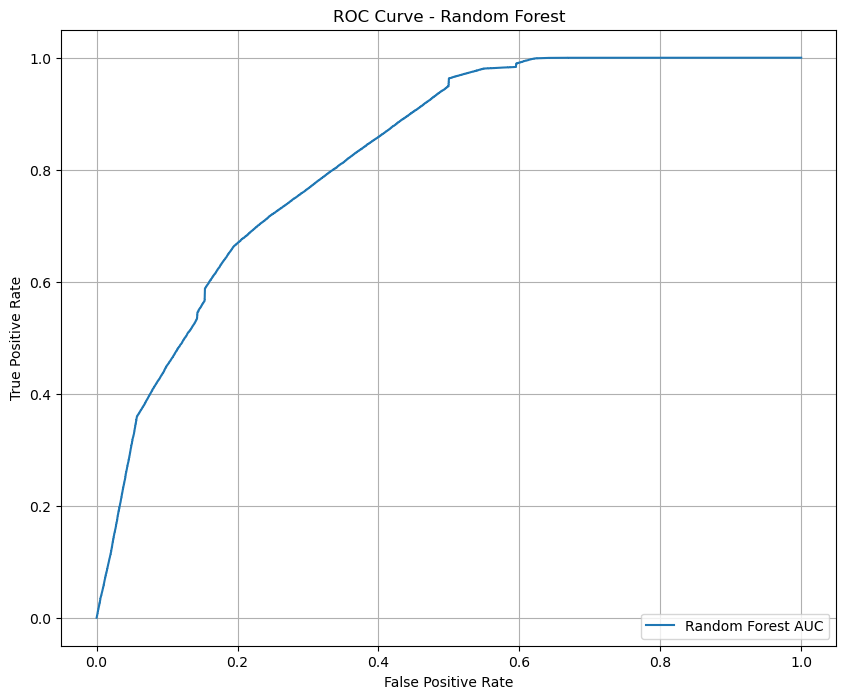

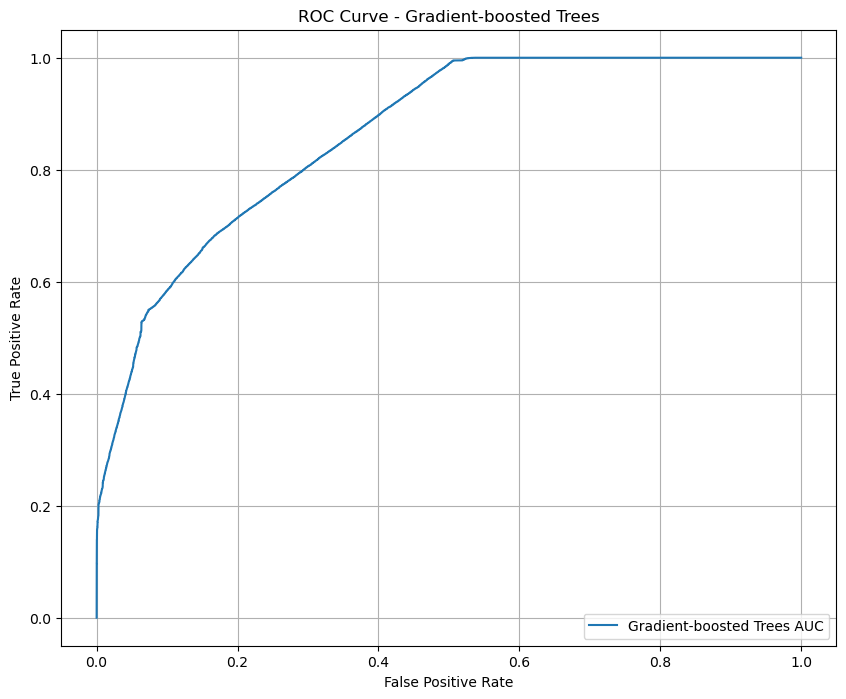

In [16]:
from pyspark.sql.functions import col
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import BinaryClassificationMetrics
import matplotlib.pyplot as plt


def get_confusion_matrix_elements(predictions):
    TP = predictions.filter((col('prediction') == 1) & (col('purchase') == 1)).count()
    TN = predictions.filter((col('prediction') == 0) & (col('purchase') == 0)).count()
    FP = predictions.filter((col('prediction') == 1) & (col('purchase') == 0)).count()
    FN = predictions.filter((col('prediction') == 0) & (col('purchase') == 1)).count()
    return TP, TN, FP, FN

rf_TP, rf_TN, rf_FP, rf_FN = get_confusion_matrix_elements(rf_predictions)
gbt_TP, gbt_TN, gbt_FP, gbt_FN = get_confusion_matrix_elements(gbt_predictions)

print("Random Forest: TP={}, TN={}, FP={}, FN={}".format(rf_TP, rf_TN, rf_FP, rf_FN))
print("Gradient-boosted Tree: TP={}, TN={}, FP={}, FN={}".format(gbt_TP, gbt_TN, gbt_FP, gbt_FN))

binary_evaluator = BinaryClassificationEvaluator(labelCol="purchase", rawPredictionCol="probability", metricName="areaUnderROC")

multi_evaluator = MulticlassClassificationEvaluator(labelCol="purchase", predictionCol="prediction")
accuracy_rf = multi_evaluator.evaluate(rf_predictions, {multi_evaluator.metricName: "accuracy"})
precision_rf = multi_evaluator.evaluate(rf_predictions, {multi_evaluator.metricName: "precisionByLabel"})
recall_rf = multi_evaluator.evaluate(rf_predictions, {multi_evaluator.metricName: "recallByLabel"})

accuracy_gbt = multi_evaluator.evaluate(gbt_predictions, {multi_evaluator.metricName: "accuracy"})
precision_gbt = multi_evaluator.evaluate(gbt_predictions, {multi_evaluator.metricName: "precisionByLabel"})
recall_gbt = multi_evaluator.evaluate(gbt_predictions, {multi_evaluator.metricName: "recallByLabel"})

print("RF AUC:", binary_evaluator.evaluate(rf_predictions))
print("GBT AUC:", binary_evaluator.evaluate(gbt_predictions))

print("RF Accuracy: {}, Precision: {}, Recall: {}".format(accuracy_rf, precision_rf, recall_rf))
print("GBT Accuracy: {}, Precision: {}, Recall: {}".format(accuracy_gbt, precision_gbt, recall_gbt))

def plot_roc_curve(predictions, model_name):
    pred_pd = predictions.select("probability", "purchase").toPandas()
    pred_pd['score'] = pred_pd['probability'].apply(lambda x: x[1])

    pred_sorted = pred_pd.sort_values('score', ascending=False)
    
    pred_sorted['cum_positive'] = pred_sorted['purchase'].cumsum()
    pred_sorted['cum_negative'] = (~pred_sorted['purchase'].astype(bool)).cumsum()
    
    total_positive = pred_sorted['purchase'].sum()
    total_negative = len(pred_sorted) - total_positive
    
    pred_sorted['tpr'] = pred_sorted['cum_positive'] / total_positive
    pred_sorted['fpr'] = pred_sorted['cum_negative'] / total_negative
    
    plt.figure(figsize=(10, 8))
    plt.plot(pred_sorted['fpr'], pred_sorted['tpr'], label=f'{model_name} AUC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - ' + model_name)
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

plot_roc_curve(rf_predictions, "Random Forest")
plot_roc_curve(gbt_predictions, "Gradient-boosted Trees")


2.4.3 Save the better model, we will need this for Part B of assignment 2.

In [ ]:
gbt_model.save("Assignment_2_model")

### Part 3: Data Ethics, Privacy, and Security <a class="anchor" name="part-4"></a>  
Please see the specification for this task and add markdown cells(word limit: 500).

In today's data-driven world, the concepts of data ethics, privacy, and security are important.

#### Data Ethics: 
Data ethics refers to the principles and standards applies on the responsible use of data, it emphasize practices that respect personal data rights and integrity. Ethical big data processing balance technological advancements with moral responsibilities, this ensures that data use benefits society without violating on individual rights. An example is the Cambridge Analytica scandal, it highlights the negative aspects when data ethics are compromised, contrasted with initiatives like GDPR, which strive to uphold data ethics positively by enforcing strict data handling standards.

#### Data Privacy:
Privacy in big data involves managing how personal data is utilized, ensuring individuals' rights to their data are respected. This includes protecting user against unauthorized data access and ensuring transparency on how data is used. The General Data Protection Regulation (GDPR) exemplifies regulatory efforts to enforce data privacy, mandating clear consent from data subjects and granting them extensive rights over their data. Enhancements in technologies such as differential privacy or encrypted data analysis represent advancements in maintaining data privacy while utilizing big data.

#### Data Security:
Security involves protecting data from unauthorized access and breaches, which is increasingly challenging as the volume and variety of data expand in big data scenarios. Effective big data security strategies encompass encryption, robust access controls, and comprehensive intrusion detection systems to safeguard data throughout its lifecycle—from collection to storage to analysis. This is critical as any security lapse can lead to significant financial and reputational damage.

Each of these elements—ethics, privacy, and security—plays a vital role in ensuring that big data technologies are implemented in a manner that respects individual rights and promotes trust in data practices. As big data continues to evolve, the ongoing development of legal frameworks, ethical guidelines, and advanced security measures will be essential to address the complexities of modern data use and to protect against the potential abuses that could undermine public confidence in data-driven technologies.

## References:
Please add your references below:

Yang, L. (2024). Ethics and security. Monash Information Technology.